In [1]:
import os
import sys

import matplotlib.pyplot as plt

from somo.sweep import RunGenerator
from somo.sweep import BatchSimulation
from somo.sweep import DataLabeler
from somo.sweep import GridPlotter
from somo.sweep import ContourPlotter
from somo.sweep import iter_utils

import numpy as np 

import run_single as sim_function
from object2urdf import ObjectUrdfBuilder

path=os.path.abspath(os.path.join('labels'))
sys.path.insert(0, path)
import label_functions

path=os.path.abspath(os.path.join('process_data'))
sys.path.insert(0, path)
from graph_performance import IHMPerformance
from condense import CondenseData

/home/clark/Documents/simulation/pybullet_SOMO


In [2]:
config_file = 'sweeps/grid_dsr.yaml'
process_further = False
plot_raw = False
recalculate_summaries = True
graph_results = False
condense = True


In [3]:
if process_further:
    gplot = IHMPerformance(config_file)
    gplot.set_label_columns(cols=[5, 0, 1], tie_to_input='Actuation Type',
                            input_vals=[0,1,2], scales=[1.0, 1000,1000],
                            labels=['Max Angle (deg.)', 'Max X-Position (mm)','Max Y-Position (mm)'])
    gplot.make_plots(labels = ['cycle_magnitude_mean'],
                     inputs=['Height','Diameter'],
                     iterate='Actuation Type',filter_col='bounding_box')

In [4]:
#condenser.count_true(column='bounding_box')
#condenser.plot(x='Palm Diameter', y='bounding_box_ratio', labels =['Ratio of Success'], marker='o')
#condenser.count_true(column='max_cycle', value=9.0)
#condenser.plot(x='Palm Diameter', y='max_cycle_ratio', labels=['Ratio of Completions'], marker='o',)
#condenser.count_true(column='grasp_after_prefix')
#condenser.plot(x='Palm Diameter', y='grasp_after_prefix_ratio', labels=['Ratio of Successful Grasps'], marker='o',)
#condenser.plot(x='Palm Height', y='grasp_after_prefix_ratio', labels=['Ratio of Successful Grasps'], marker='o',)

In [5]:
condenser = CondenseData(config_file)
condenser.set_label_columns(label='cycle_magnitude_mean', cols=[5, 0, 1],
                            tie_to_input='Actuation Type',
                            input_vals=[0,1,2], scales=[1.0, 1000,1000],
                            col_labels=['Max Angle (deg.)', 'Max X-Position (mm)','Max Y-Position (mm)'])
condenser.set_label_columns(label='cycle_magnitude_std', cols=[5, 0, 1],
                            tie_to_input='Actuation Type',
                            input_vals=[0,1,2], scales=[1.0, 1000,1000],
                            col_labels=['Angular Repeatabillity (deg.)', 'X-Axis Repeatabillity (mm)','Y-Axis Repeatabillity (mm)'])

condenser.get_vars()

In [6]:
if recalculate_summaries:
    condenser.condense(labels=['mean_link'], filter_cols=['height_check','bounding_box'])
    #condenser.condense(labels=['cycle_magnitude_std'], filter_cols=['bounding_box','max_cycle_complete','grasp_after_prefix'])
    condenser.save_summary()

/media/clark/The Flash/somo_data/roa_sweep/objects_centering
/media/clark/The Flash/somo_data/roa_sweep/objects_centering/__manipulator__fingers__distal_seg_ratio_0.0000
/media/clark/The Flash/somo_data/roa_sweep/objects_centering/__manipulator__fingers__distal_seg_ratio_0.0500
/media/clark/The Flash/somo_data/roa_sweep/objects_centering/__manipulator__fingers__distal_seg_ratio_0.1000
/media/clark/The Flash/somo_data/roa_sweep/objects_centering/__manipulator__fingers__distal_seg_ratio_0.1500
/media/clark/The Flash/somo_data/roa_sweep/objects_centering/__manipulator__fingers__distal_seg_ratio_0.2000
/media/clark/The Flash/somo_data/roa_sweep/objects_centering/__manipulator__fingers__distal_seg_ratio_0.2500
/media/clark/The Flash/somo_data/roa_sweep/objects_centering/__manipulator__fingers__distal_seg_ratio_0.3000
/media/clark/The Flash/somo_data/roa_sweep/objects_centering/__manipulator__fingers__distal_seg_ratio_0.3500
/media/clark/The Flash/somo_data/roa_sweep/objects_centering/__mani

In [7]:
# Load summary from a file
condenser.load_summary()
condenser.get_vars()
condenser.save_summary()

In [8]:
print(condenser.overall.keys())

print(condenser.overall['Distal Segment Ratio'])

dict_keys(['Distal Segment Ratio', 'mean_link'])
[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]


In [9]:
condenser.raw['Object Width'] = condenser.get_data_dim(column ='Width')
condenser.raw['Object Height'] = condenser.get_data_dim(column ='Height')
condenser.raw['Centering Position'] = condenser.get_data_dim(column ='Centering Position')
condenser.raw['mean_link'] = condenser.get_data_dim(column ='mean_link')

condenser.raw['bounding_box'] = condenser.get_data_dim(column ='bounding_box')
condenser.raw['height_check'] = condenser.get_data_dim(column ='height_check')

/media/clark/The Flash/somo_data/roa_sweep/objects_centering
/media/clark/The Flash/somo_data/roa_sweep/objects_centering/__manipulator__fingers__distal_seg_ratio_0.0000
/media/clark/The Flash/somo_data/roa_sweep/objects_centering/__manipulator__fingers__distal_seg_ratio_0.0500
/media/clark/The Flash/somo_data/roa_sweep/objects_centering/__manipulator__fingers__distal_seg_ratio_0.1000
/media/clark/The Flash/somo_data/roa_sweep/objects_centering/__manipulator__fingers__distal_seg_ratio_0.1500
/media/clark/The Flash/somo_data/roa_sweep/objects_centering/__manipulator__fingers__distal_seg_ratio_0.2000
/media/clark/The Flash/somo_data/roa_sweep/objects_centering/__manipulator__fingers__distal_seg_ratio_0.2500
/media/clark/The Flash/somo_data/roa_sweep/objects_centering/__manipulator__fingers__distal_seg_ratio_0.3000
/media/clark/The Flash/somo_data/roa_sweep/objects_centering/__manipulator__fingers__distal_seg_ratio_0.3500
/media/clark/The Flash/somo_data/roa_sweep/objects_centering/__mani

In [10]:
condenser.overall['RAW Object Width']=[]
condenser.overall['RAW Object Height']=[]
condenser.overall['RAW mean_link']=[]
condenser.overall['RAW height_check']=[]
condenser.overall['RAW bounding_box']=[]
condenser.overall['RAW Distal Segment Ratio']=[]
condenser.overall['RAW Centering Position']=[]


num_top_level = len(condenser.overall['Distal Segment Ratio'])

print(condenser.overall['Distal Segment Ratio'])

for idx in range(num_top_level):
    lens = len(condenser.raw['Object Height'][idx])
    condenser.overall['RAW Object Width'].extend(condenser.raw['Object Width'][idx].tolist())
    condenser.overall['RAW Object Height'].extend(condenser.raw['Object Height'][idx].tolist())
    condenser.overall['RAW mean_link'].extend(condenser.raw['mean_link'][idx])
    condenser.overall['RAW Distal Segment Ratio'].extend([condenser.overall['Distal Segment Ratio'][idx]]*lens)
    condenser.overall['RAW height_check'].extend(condenser.raw['height_check'][idx])
    condenser.overall['RAW bounding_box'].extend(condenser.raw['bounding_box'][idx])
    condenser.overall['RAW Centering Position'].extend(condenser.raw['Centering Position'][idx])

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]


In [11]:
import pandas as pd
df_gen = {}
for key in condenser.overall.keys():
    if 'RAW' in key:
        df_gen[key] =condenser.overall[key]

df = pd.DataFrame(df_gen)

In [12]:
df

,RAW Object Width,RAW Object Height,RAW mean_link,RAW height_check,RAW bounding_box,RAW Distal Segment Ratio,RAW Centering Position
0,10,60,NaN,0,0,0.0,0.6
1,10,60,NaN,0,0,0.0,0.5
2,10,60,20.000000,1,1,0.0,0.4
3,10,60,NaN,0,0,0.0,0.3
4,10,60,NaN,0,0,0.0,0.2
...,...,...,...,...,...,...,...
2305,120,60,NaN,0,0,0.7,-1.1
2306,120,60,15.764706,1,0,0.7,-1.2
2307,120,60,NaN,0,0,0.7,-1.3
2308,120,60,NaN,0,0,0.7,-1.4


In [42]:
import copy
from matplotlib import rcParams
import matplotlib
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 10


filter_cols=['RAW bounding_box','RAW height_check']

df11 = copy.deepcopy(df)
if isinstance(filter_cols,list):
    for filter_col in filter_cols:
        df11=df11[df11[filter_col]==1]

df11['RAW Centering Position']=(-df11['RAW Centering Position']/20*1000 +100)

dsr_cuttoff=1.0
df11=df11[df11['RAW Distal Segment Ratio']<=dsr_cuttoff]

dsr_vals=df11['RAW Distal Segment Ratio'].unique()

for dsr_curr in dsr_vals:

    print(dsr_curr)


    df12=df11[df11['RAW Distal Segment Ratio']==dsr_curr]


    z_vals = []
    for row in df12['RAW mean_link'].values:
        if row is None:
            z_vals.append(None)
        else:
            z_vals.append(row)



    z_vals = np.array(z_vals, dtype=np.float64)
    mask=np.isnan(z_vals)
    x=df12['RAW Centering Position'].values[~mask]
    y=df12['RAW Object Width'].values[~mask]
    z=z_vals[~mask]

    print(min(z))
    print(max(z))

    fig = plt.figure()
    fig.patch.set_color('w')

    plt.tricontourf(x,y,z, cmap='Blues', levels=np.linspace(0,20,11), extend='max')
    cbar = plt.colorbar()
    plt.xlabel('Centering Position')
    plt.ylabel('Object Width')

    cbar.set_label('Link Where Object Touches Finger')
    #cbar.set_clim(0,20)

    basename = iter_utils.get_group_folder(condenser.config)
    figname='dsr%0.2f_roa_plot.png'%(dsr_curr)
    allname = os.path.join(basename, figname)
    plt.savefig(allname, dpi=450)
    plt.savefig(allname.replace('.png','.svg'), dpi=450)

    plt.close()



0.0
8.533333333333333
20.0
0.05
8.533333333333333
20.0
0.1
8.0
20.0
0.15
8.166666666666668
20.0
0.2
8.666666666666668
20.0
0.25
7.0
20.0
0.3
8.923076923076923
19.714285714285715
0.35
9.5
19.23076923076923
0.4
9.5
18.266666666666666
0.45
10.0
20.0
0.5
9.909090909090908
19.5
0.55
12.0
20.0
0.6
13.833333333333334
18.416666666666668
0.65
12.615384615384615
20.0
0.7
13.666666666666666
20.0


In [43]:
import copy
import matplotlib
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] =7


filter_cols=['RAW bounding_box','RAW height_check']

df11 = copy.deepcopy(df)
if isinstance(filter_cols,list):
    for filter_col in filter_cols:
        df11=df11[df11[filter_col]==1]


df11['RAW Centering Position']=(-df11['RAW Centering Position']/20*1000 +100)

dsr_cuttoff=1.0
df11=df11[df11['RAW Distal Segment Ratio']<=dsr_cuttoff]

dsr_vals=df11['RAW Distal Segment Ratio'].unique()

for dsr_curr in dsr_vals:

    print(dsr_curr)


    df12=df11[df11['RAW Distal Segment Ratio']==dsr_curr]


    z_vals = []
    for row in df12['RAW mean_link'].values:
        if row is None:
            z_vals.append(None)
        else:
            if row/20 > (1.0-dsr_curr):
                z_vals.append(2)
            else:
                z_vals.append(1)



    z_vals = np.array(z_vals, dtype=np.float64)
    mask=np.isnan(z_vals)
    x=df12['RAW Centering Position'].values[~mask]
    y=df12['RAW Object Width'].values[~mask]
    z=z_vals[~mask]

    print(min(z))
    print(max(z))

    fig = plt.figure()
    fig.patch.set_color('w')

    plt.tricontourf(x,y,z, cmap='Blues',levels=0, extend='max')
    #cbar = plt.colorbar()
    plt.xlabel('Centering Position')
    plt.ylabel('Object Width')

    #cbar.set_label('Link Where Object Touches Finger')
    #cbar.set_clim(0,20)

    basename = iter_utils.get_group_folder(condenser.config)
    figname='cutoff_dsr%0.2f_roa_plot.png'%(dsr_curr)
    allname = os.path.join(basename, figname)
    plt.savefig(allname, dpi=450)
    plt.savefig(allname.replace('.png','.svg'), dpi=450)

    plt.close()


0.0
1.0
1.0
0.05
1.0
2.0
0.1
1.0
2.0
0.15
1.0
2.0
0.2
1.0
2.0
0.25
1.0
2.0
0.3
1.0
2.0
0.35
1.0
2.0
0.4
1.0
2.0
0.45
1.0
2.0
0.5
1.0
2.0
0.55
1.0
2.0
0.6
1.0
2.0
0.65
1.0
2.0
0.7
1.0
2.0


In [60]:
import copy
from matplotlib import rcParams
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
rcParams['font.size'] =7


filter_cols=['RAW bounding_box','RAW height_check']

df11 = copy.deepcopy(df)
if isinstance(filter_cols,list):
    for filter_col in filter_cols:
        df11=df11[df11[filter_col]==1]

dsr_cuttoff=0.5
df11=df11[df11['RAW Distal Segment Ratio']<=dsr_cuttoff]

df11['RAW Centering Position']=(-df11['RAW Centering Position']/20*1000 +100)

dsr_vals=df11['RAW Distal Segment Ratio'].unique()


fig = plt.figure(figsize=(6.5,2.0))
fig.patch.set_color('w')

N = len(dsr_vals)

for idx,dsr_curr in enumerate(dsr_vals):
    print(dsr_curr)

    df12=df11[df11['RAW Distal Segment Ratio']==dsr_curr]
    z_vals = []
    for row in df12['RAW mean_link'].values:
        if row is None:
            z_vals.append(None)
        else:
            if row/20 > (1.0-dsr_curr):
                z_vals.append(1)
            else:
                z_vals.append(0)

    z_vals = np.array(z_vals, dtype=np.float64)
    mask=np.isnan(z_vals)
    x=df12['RAW Centering Position'].values[~mask]
    y=df12['RAW Object Width'].values[~mask]
    z=z_vals[~mask]

    print(min(z))
    print(max(z))

    plt.subplot(1,N,idx+1)

    plt.tricontourf(x,y,z, cmap='Blues',levels=[0,1,2], extend='max')
    #cbar = plt.colorbar()
    #plt.xlabel('Centering Position')
    plt.title("%0.2f"%(dsr_curr))

    if idx==0:
        plt.ylabel('Object Width (mm)')
        #plt.xlabel('Hand Centering Position (mm)')
    else:
        ax=plt.gca()
        ax.set(yticklabels=[])  # remove the tick labels
        ax.tick_params(left=False)  # remove the ticks

    if idx==4:
        plt.xlabel('Hand Centering Position (mm)')

    #cbar.set_label('Link Where Object Touches Finger')
    #cbar.set_clim(0,20)

plt.tight_layout()

basename = iter_utils.get_group_folder(condenser.config)
figname='all_in_one_dsr_roa_plot_clip.png'%(dsr_curr)
allname = os.path.join(basename, figname)
plt.savefig(allname, dpi=450)
plt.savefig(allname.replace('.png','.svg'), dpi=450)

plt.close()


0.0
0.0
0.0
0.05
0.0
1.0
0.1
0.0
1.0
0.15
0.0
1.0
0.2
0.0
1.0
0.25
0.0
1.0
0.3
0.0
1.0
0.35
0.0
1.0
0.4
0.0
1.0
0.45
0.0
1.0
0.5
0.0
1.0


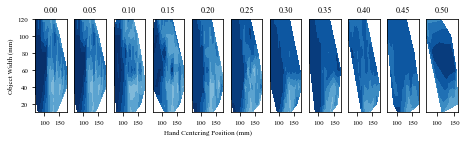

In [59]:
import copy
from matplotlib import rcParams
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
rcParams['font.size'] =7


filter_cols=['RAW bounding_box','RAW height_check']

df11 = copy.deepcopy(df)
if isinstance(filter_cols,list):
    for filter_col in filter_cols:
        df11=df11[df11[filter_col]==1]

dsr_cuttoff=0.5
df11=df11[df11['RAW Distal Segment Ratio']<=dsr_cuttoff]

df11['RAW Centering Position']=(-df11['RAW Centering Position']/20*1000 +100)

dsr_vals=df11['RAW Distal Segment Ratio'].unique()


fig = plt.figure(figsize=(6.5,2.0))
fig.patch.set_color('w')

N = len(dsr_vals)

for idx,dsr_curr in enumerate(dsr_vals):
    #print(dsr_curr)

    df12=df11[df11['RAW Distal Segment Ratio']==dsr_curr]
    z_vals = []
    for row in df12['RAW mean_link'].values:
        if row is None:
            z_vals.append(None)
        else:
            z_vals.append(row)

    z_vals = np.array(z_vals, dtype=np.float64)
    mask=np.isnan(z_vals)
    x=df12['RAW Centering Position'].values[~mask]
    y=df12['RAW Object Width'].values[~mask]
    z=z_vals[~mask]

    #print(min(z))
    #print(max(z))

    plt.subplot(1,N,idx+1)

    plt.tricontourf(x,y,z, cmap='Blues',levels=np.linspace(0,20,11), extend='max')
    #cbar = plt.colorbar()
    #plt.xlabel('Centering Position')
    plt.title("%0.2f"%(dsr_curr))

    if idx==0:
        plt.ylabel('Object Width (mm)')
        #plt.xlabel('Hand Centering Position (mm)')
    else:
        ax=plt.gca()
        ax.set(yticklabels=[])  # remove the tick labels
        ax.tick_params(left=False)  # remove the ticks

    if idx==4:
        plt.xlabel('Hand Centering Position (mm)')

    #cbar.set_label('Link Where Object Touches Finger')
    #cbar.set_clim(0,20)

plt.tight_layout()

basename = iter_utils.get_group_folder(condenser.config)
figname='all_in_one_dsr_roa_plot.png'%(dsr_curr)
allname = os.path.join(basename, figname)
plt.savefig(allname, dpi=450)
plt.savefig(allname.replace('.png','.svg'), dpi=450)

plt.show()

plt.close()

101
101
101
93
93
93
108
108
108
101
101
101
93
93
93
108
108
108


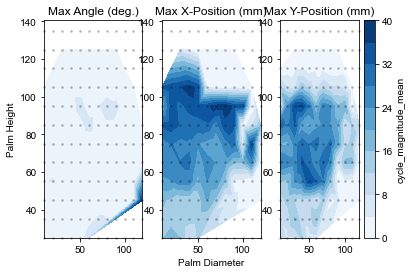

In [27]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 10


condenser.contour_plot(x='Distal Segment Ratio', y='Palm Height', z='cycle_magnitude_std',
               labels=['Angular Variation (deg.)', 'X-Axis Variation (mm)','Y-Axis Variation (mm)'],
               subfield = 'mean',
               contour={'cmap':'Blues_r', 'levels':10},
               points={'color': 'k', 'marker':'.', 'markersize':5, 'markeredgewidth':0, 'linestyle':'', 'alpha':0.3})
condenser.contour_plot(x='Palm Diameter', y='Palm Height', z='cycle_magnitude_mean',
               labels=['Max Angle (deg.)', 'Max X-Position (mm)','Max Y-Position (mm)'],
               subfield = 'mean',
               contour={'cmap':'Blues', 'levels':10},
               points={'color': 'k', 'marker':'.', 'markersize':5, 'markeredgewidth':0, 'linestyle':'', 'alpha':0.3})

condenser.overall['Palm Height'] = height

In [28]:

if recalculate_summaries:
    condenser.find_mins(labels=['Width'], min_col='Width', filter_cols=['bounding_box','max_cycle_complete','grasp_after_prefix'])
    condenser.save_summary()


In [78]:
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] =7

condenser.overall.keys()

height=condenser.overall['Palm Height']
condenser.overall['Palm Height'] = (np.array(height)*1000).tolist()

try:
    figname = condenser.contour_plot(x='Palm Diameter', y='Palm Height', z='Width_min_Width', subfield='min',
                   labels=['Minimum Object Width Grasped'], 
                   contour={'cmap':'Blues_r', 'levels':10},
                   points={'color': 'k', 'marker':'.', 'markersize':5, 'markeredgewidth':0, 'linestyle':'', 'alpha':0.3})


    def get_colorbars(fig):
        cbs = []
        for ax in fig.axes:
            cbs.extend(ax.findobj(lambda obj: hasattr(obj, "colorbar") and obj.colorbar))
        return [a.colorbar for a in cbs]

    fig=plt.gcf()
    axes = fig.axes
    ax = axes[0]
    ax.set_xlabel("Palm Diameter (mm)")
    ax.set_ylabel("Palm Surface Height (mm)")
    
    plt.sca(ax)
    #plt.plot([70, 40, 20],[70, 85, 100],'^r--', markersize=7)
    plt.plot([70, 40,40, 20,20],[70, 70,85,85, 100],'^r--', markersize=7)

    cbar = axes[-1]
    cbar.set_ylabel("Minimum Successful Object Width (mm)")

    plt.savefig(figname, dpi=450)
    plt.savefig(figname.replace('.png','.svg'), dpi=450)
    
    condenser.overall['Palm Height'] = height
    
except:
    condenser.overall['Palm Height'] = height
    raise

KeyError: 'Palm Height'

In [30]:
override = False
if recalculate_summaries or override:
    condenser.find_mins(labels=['Height'], min_col='Height', filter_cols=['bounding_box','max_cycle_complete','grasp_after_prefix'])
    condenser.save_summary()

108
108
108


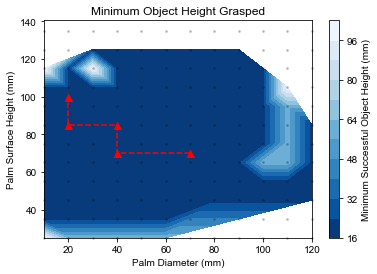

In [43]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 10

condenser.overall.keys()
height=condenser.overall['Palm Height']
condenser.overall['Palm Height'] = (np.array(height)*1000).tolist()

try:
    figname = condenser.contour_plot(x='Palm Diameter', y='Palm Height', z='Height_min_Height', subfield='min',
                   labels=['Minimum Object Height Grasped'], 
                   contour={'cmap':'Blues_r', 'levels':10},
                   points={'color': 'k', 'marker':'.', 'markersize':5, 'markeredgewidth':0, 'linestyle':'', 'alpha':0.3})


    def get_colorbars(fig):
        cbs = []
        for ax in fig.axes:
            cbs.extend(ax.findobj(lambda obj: hasattr(obj, "colorbar") and obj.colorbar))
        return [a.colorbar for a in cbs]

    fig=plt.gcf()
    axes = fig.axes
    ax = axes[0]
    ax.set_xlabel("Palm Diameter (mm)")
    ax.set_ylabel("Palm Surface Height (mm)")
    
    plt.sca(ax)
    #plt.plot([70, 40, 20],[70, 85, 100],'^r--', markersize=7)
    plt.plot([70, 40,40, 20,20],[70, 70,85,85, 100],'^r--', markersize=7)

    cbar = axes[-1]
    cbar.set_ylabel("Minimum Successful Object Height (mm)")

    plt.savefig(figname, dpi=450)
    plt.savefig(figname.replace('.png','.svg'), dpi=450)
    
    condenser.overall['Palm Height'] = height

except:
    condenser.overall['Palm Height'] = height
    raise

In [24]:
if recalculate_summaries:
    condenser.condense(labels=['max_cycle'], filter_cols=['grasp_after_prefix'])
    condenser.save_summary()

115
115
115


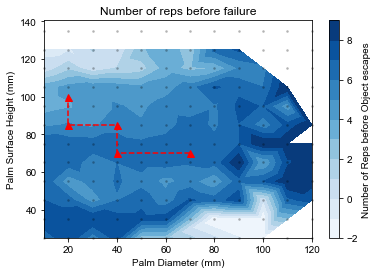

In [44]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 10

condenser.overall.keys()
height=condenser.overall['Palm Height']
condenser.overall['Palm Height'] = (np.array(height)*1000).tolist()

try:

    figname = condenser.contour_plot(x='Palm Diameter', y='Palm Height', z='max_cycle', subfield='mean',
                   labels=['Number of reps before failure'], 
                   contour={'cmap':'Blues', 'levels':10},
                   points={'color': 'k', 'marker':'.', 'markersize':5, 'markeredgewidth':0, 'linestyle':'', 'alpha':0.3})


    def get_colorbars(fig):
        cbs = []
        for ax in fig.axes:
            cbs.extend(ax.findobj(lambda obj: hasattr(obj, "colorbar") and obj.colorbar))
        return [a.colorbar for a in cbs]

    fig=plt.gcf()
    axes = fig.axes
    ax = axes[0]
    ax.set_xlabel("Palm Diameter (mm)")
    ax.set_ylabel("Palm Surface Height (mm)")
    
    plt.sca(ax)
    #plt.plot([70, 40, 20],[70, 85, 100],'^r--', markersize=7)
    plt.plot([70, 40,40, 20,20],[70, 70,85,85, 100],'^r--', markersize=7)

    cbar = axes[-1]
    cbar.set_ylabel("Number of Reps before Object escapes")

    plt.savefig(figname, dpi=450)
    plt.savefig(figname.replace('.png','.svg'), dpi=450)
    
    condenser.overall['Palm Height'] = height

except:
    condenser.overall['Palm Height'] = height
    raise

In [ ]:
condenser.condense(labels=['cycle_magnitude_mean'], filter_cols=['bounding_box','max_cycle_complete','grasp_after_prefix'])               
condenser.plot_percentiles(x='Palm Diameter', y='cycle_magnitude_mean',
               labels=['Max Angle (deg.)', 'Max X-Position (mm)','Max Y-Position (mm)'],
               marker='o')
condenser.plot_percentiles(x='Palm Diameter', y='cycle_magnitude_std',
               labels=['Angular Repeatabillity (deg.)', 'X-Axis Repeatabillity (mm)','Y-Axis Repeatabillity (mm)'],
               marker='o')
condenser.plot_percentiles(x='Palm Height', y='cycle_magnitude_mean',
               labels=['Max Angle (deg.)', 'Max X-Position (mm)','Max Y-Position (mm)'],
               marker='o')
condenser.plot_percentiles(x='Palm Height', y='cycle_magnitude_std',
               labels=['Angular Repeatabillity (deg.)', 'X-Axis Repeatabillity (mm)','Y-Axis Repeatabillity (mm)'],
               marker='o')




condenser.set_label_columns(label='cycle_magnitude_std', cols=[0, 5, 5],
                            tie_to_input='Actuation Type',
                            input_vals=[0,1,2], scales=[1000, 1.0,1.0],
                            col_labels=['X-Axis of-axis (mm)', 'Angular off-axis (deg.)','Angular off-axis (deg.)'])

condenser.condense(labels=['cycle_magnitude_std'], filter_cols=['bounding_box','max_cycle_complete','grasp_after_prefix'])
condenser.plot_percentiles(x='Palm Diameter', y='cycle_magnitude_std',
               labels=['X-Axis of-axis (mm)', 'Angular off-axis (deg.)','Angular off-axis (deg.)'],
               suffix='_off-axis',
               marker='o')


#condenser.condense(labels = ['bounding_box'], filter_col='bounding_box')
#condenser.condense(labels = ['cycle_magnitude_mean'], filter_col='bounding_box')